<a href="https://colab.research.google.com/github/MuhammadWaleed34/Lab_Assignment-01/blob/main/AI_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

colors = ['Red', 'Green', 'Blue']
regions = ['WA', 'NT', 'SA', 'Q', 'NSW', 'V', 'T']
neighbors = {
    'WA': ['NT', 'SA'],
    'NT': ['WA', 'SA', 'Q'],
    'SA': ['WA', 'NT', 'Q', 'NSW', 'V'],
    'Q': ['NT', 'SA', 'NSW'],
    'NSW': ['SA', 'Q', 'V'],
    'V': ['SA', 'NSW'],
    'T': []
}

def is_valid(region, color, assignment):
    for neighbor in neighbors[region]:
        if neighbor in assignment and assignment[neighbor] == color:
            return False
    return True

def backtrack(assignment):
    if len(assignment) == len(regions):
        return assignment

    unassigned = [r for r in regions if r not in assignment][0]
    for color in colors:
        if is_valid(unassigned, color, assignment):
            assignment[unassigned] = color
            result = backtrack(assignment)
            if result:
                return result
            del assignment[unassigned]
    return None

solution = backtrack({})
print("Map Coloring Solution:")
print(solution)


Map Coloring Solution:
{'WA': 'Red', 'NT': 'Green', 'SA': 'Blue', 'Q': 'Red', 'NSW': 'Green', 'V': 'Red', 'T': 'Red'}


             Timestamp  FIT101  LIT101  P101  P102  MV101   Label
0  2025-01-01 00:00:00    2.45   800.0     1     0      1  Normal
1  2025-01-01 00:01:00    2.50   805.0     1     0      1  Normal
2  2025-01-01 00:02:00    2.47   802.0     1     0      1  Normal
3  2025-01-01 00:03:00    2.48   803.0     0     1      1  Attack
4  2025-01-01 00:04:00    2.49   799.0     0     1      1  Attack
          FIT101      LIT101       P101       P102      MV101
count  10.000000   10.000000  10.000000  10.000000  10.000000
mean    2.475000  801.100000   0.600000   0.400000   0.500000
std     0.021731    2.330951   0.516398   0.516398   0.527046
min     2.440000  798.000000   0.000000   0.000000   0.000000
25%     2.462500  799.250000   0.000000   0.000000   0.000000
50%     2.475000  800.500000   1.000000   0.000000   0.500000
75%     2.487500  802.750000   1.000000   1.000000   1.000000
max     2.510000  805.000000   1.000000   1.000000   1.000000
<class 'pandas.core.frame.DataFrame'>
RangeInd

<Figure size 2000x1500 with 0 Axes>

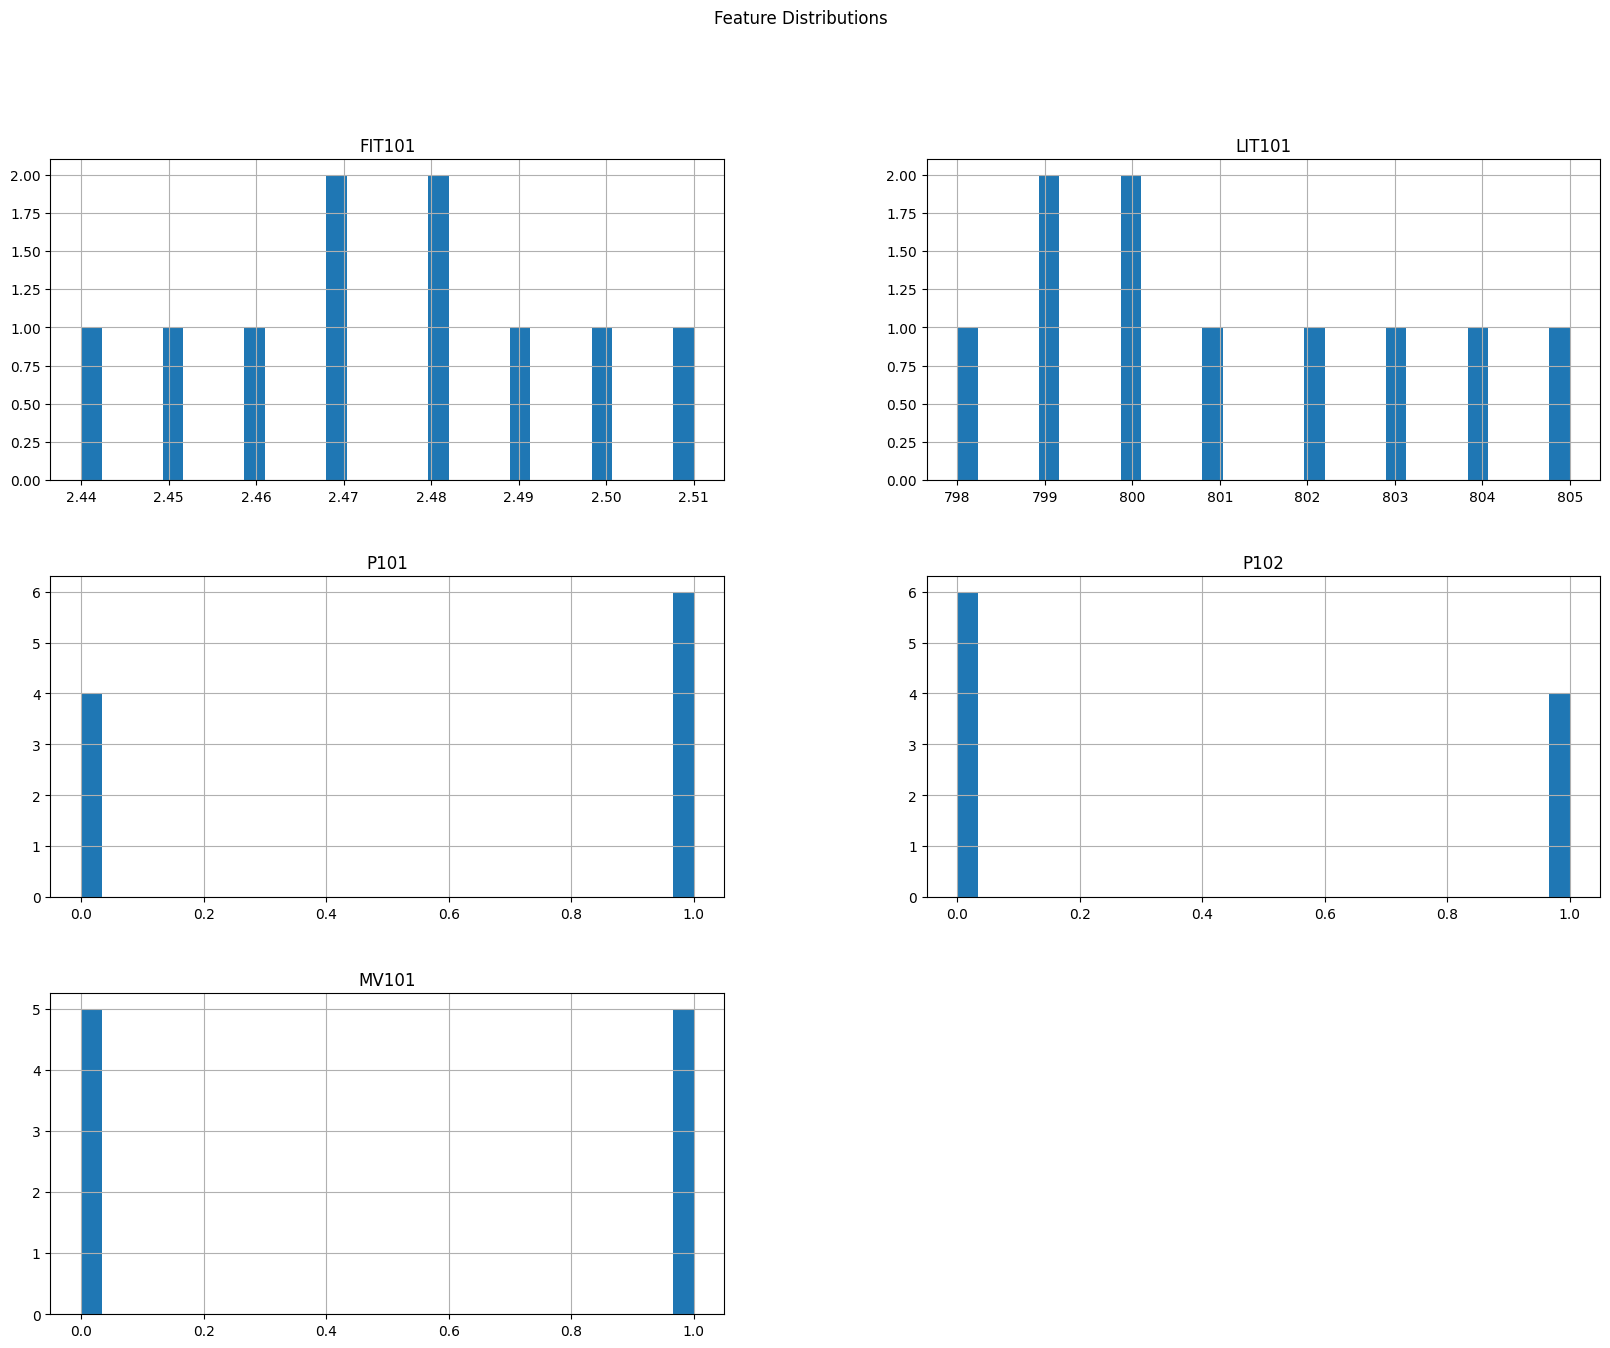


--- KNN Model Evaluation ---
Accuracy: 0.3333333333333333
              precision    recall  f1-score   support

      Attack       0.00      0.00      0.00         2
      Normal       0.33      1.00      0.50         1

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3


--- KMeans Clustering ---
Silhouette Score: 0.24010845881425386

--- Model Comparison ---
    Model            Metric     Score                Remarks
0     KNN          Accuracy  0.333333    Supervised Learning
1  KMeans  Silhouette Score  0.240108  Unsupervised Learning


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

df = pd.read_csv("SWaT_Dataset.csv")
print(df.head())
print(df.describe())
print(df.info())

plt.figure(figsize=(20, 15))
df.hist(bins=30, figsize=(20, 15))
plt.suptitle("Feature Distributions")
plt.show()

df = df.dropna()
X = df.drop(['Label', 'Timestamp'], axis=1)
y = df['Label']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("\n--- KNN Model Evaluation ---")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X_scaled)
labels = kmeans.labels_

print("\n--- KMeans Clustering ---")
print("Silhouette Score:", silhouette_score(X_scaled, labels))

comparison = pd.DataFrame({
    'Model': ['KNN', 'KMeans'],
    'Metric': ['Accuracy', 'Silhouette Score'],
    'Score': [accuracy_score(y_test, y_pred_knn), silhouette_score(X_scaled, labels)],
    'Remarks': ['Supervised Learning', 'Unsupervised Learning']
})

print("\n--- Model Comparison ---")
print(comparison)